In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Problem 4

Book Exercise 5.6 (a)

(a) Consider the Polya urn model. Simulate this model with acomputer by
starting with one red and one green ball and continuing until the number of balls in the urn is 1000. Note the fraction of red balls in the 1000 balls. Do this simulation at least 2000 times and note how many times the fraction of red balls is in the intervals (0,.05),.05, .1), ... , .95, 1). From the simulation data, make a conjecture as to what the distribution of the fraction of red balls looks like.

Text(0, 0.5, 'Number of Trials')

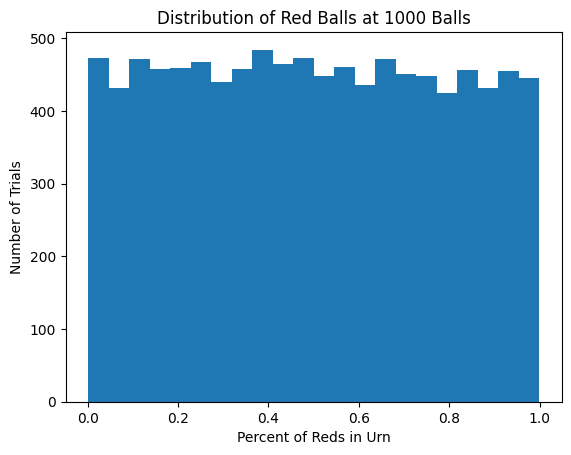

In [2]:
number_of_trials = 10000

def polya_urn_simulation(reds = 1, greens = 1, max_balls = 1000):
  while reds + greens < max_balls:
    selection = np.random.randint(1, reds + greens + 1)
    if 1 <= selection <= reds:
      reds += 1
    elif reds + 1 <= selection <= reds + greens:
      greens += 1
  return reds / (reds + greens)

red_frequencies = []
for i in range(number_of_trials):
  red_frequencies.append(polya_urn_simulation())

plt.hist(red_frequencies, bins='auto')
plt.title('Distribution of Red Balls at 1000 Balls')
plt.xlabel('Percent of Reds in Urn')
plt.ylabel('Number of Trials')


Book Exercise 5.6 (b)

(b) Do another simulation of the Polya urn model. Again, start with one red and one green ball and continue until there are 1000 balls in the urn. Note the proportion of red balls at this time and then continue until there are 2000
balls. Compare these two numbers (i.e., compare M998 and M1998). Do this at least 100 times.

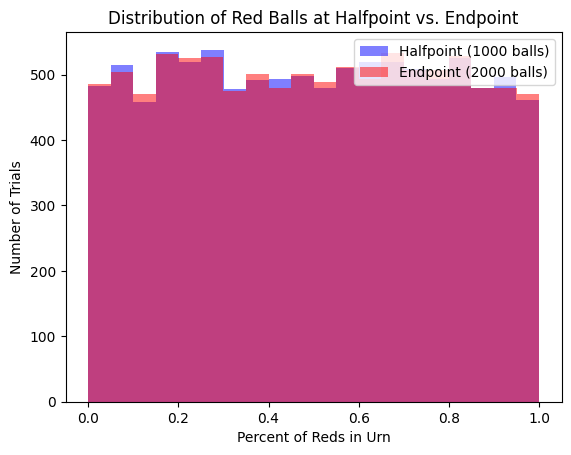

In [3]:
number_of_trials = 10000

def polya_urn_simulation(reds = 1, greens = 1, max_balls = 2000):
  middle_benchmark = -1
  while reds + greens < max_balls:
    if reds + greens == 1000:
      middle_benchmark = reds / (reds + greens)

    selection = np.random.randint(1, reds + greens + 1)
    if 1 <= selection <= reds:
      reds += 1
    elif reds + 1 <= selection <= reds + greens:
      greens += 1
  
  return (middle_benchmark, reds / (reds + greens))

red_frequencies_1000 = []
red_frequencies_2000 = []

for i in range(number_of_trials):
  halfpoint, endpoint = polya_urn_simulation()
  red_frequencies_1000.append(halfpoint)
  red_frequencies_2000.append(endpoint)

# print(red_frequencies)
plt.hist(red_frequencies_1000, bins=20, alpha=0.5, label='Halfpoint (1000 balls)', color='blue')
plt.hist(red_frequencies_2000, bins=20, alpha=0.5, label='Endpoint (2000 balls)', color='red')
plt.xlabel('Percent of Reds in Urn')
plt.ylabel('Number of Trials')
plt.legend(loc='upper right')
plt.title('Distribution of Red Balls at Halfpoint vs. Endpoint')
plt.show()
